In [17]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [18]:
env = gym.make('Taxi-v3')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [19]:
! pip install pygame

In [20]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [21]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [22]:
!apt-get install -y xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.12).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [23]:
from IPython import display
from pyvirtualdisplay import Display
from matplotlib import animation

d = Display()
d.start()

Episode: 9
Score: -785


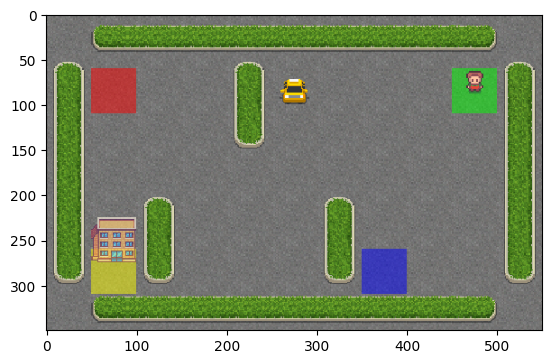

In [24]:
episodes = 10

for episode in range(1, episodes):
  state = env.reset()
  done = False
  score = 0
  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  while not done:
    next_state, reward, done, info = env.step(env.action_space.sample())
    score += reward
    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))
  print('Episode: {}\nScore: {}'.format(episode, score))

In [ ]:
'''dpi = 72
interval = 50 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))'''

"dpi = 72\ninterval = 50 # ms\n\nplt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)\npatch = plt.imshow(img[0])\nplt.axis=('off')\nanimate = lambda i: patch.set_data(img[i])\nani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)\ndisplay.display(display.HTML(ani.to_jshtml()))"

Implementing Q-Learning Algorithm

In [25]:
actions = env.action_space.n
state = env.observation_space.n

q_table = np.zeros((state, actions))

In [26]:
#Creating Parameters
num_episodes = 10000
max_steps_per_episode = 100
learning_rate = .1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []

In [27]:
for episode in range(num_episodes):
  state = env.reset()
  done = False
  rewards_cur_episode = 0

  for step in range(max_steps_per_episode):

    #Exploration Vs Exploitation trade-off
    exploration_threshold = np.random.uniform(0, 1)
    # if greater than then we will take an action based on the q_table
    if exploration_threshold > exploration_rate:
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    next_state, reward, done, info = env.step(action)


    q_table[state, action] = q_table[state, action]*(1-learning_rate) + learning_rate*(reward + discount_rate*np.max(q_table[next_state, :]))

    state = next_state
    rewards_cur_episode += reward

    if done == True:
      break
  #Exploration rate decay
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

  rewards_all_episodes.append(rewards_cur_episode)

print("*******Training Finished*******")

*******Training Finished*******


In [28]:
q_table

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.14282433,   3.37882931,  -3.95604843,  -1.19035288,
          9.6220697 ,  -8.14564662],
       [  6.52220483,   4.95265599,   5.37447068,   6.21218549,
         14.11880599,  -6.13467626],
       ...,
       [ -1.41475846,  10.83156777,  -1.25978492,  -1.53554879,
         -9.34586372,  -9.38046621],
       [ -3.05036189,   0.2383066 ,  -3.04852633,  -2.81093194,
        -10.79548   ,  -8.84345148],
       [  1.41767218,   0.43996352,   3.68592637,  18.26049473,
         -1.77807985,  -2.19973028]])

Evaluating the Model

In [29]:
rewards_per_1000_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
cnt = 1000

print("Average per thousand episodes")
for r in rewards_per_1000_episodes:
  print(cnt, ": ", str(sum(r/1000)))
  cnt += 1000

Average per thousand episodes
1000 :  -247.9719999999995
2000 :  -35.15599999999996
3000 :  1.952999999999994
4000 :  5.972999999999983
5000 :  6.565999999999969
6000 :  7.096999999999953
7000 :  7.4429999999999605
8000 :  7.502999999999961
9000 :  7.384999999999965
10000 :  7.5639999999999725


step:  14  reward:  20
******Reached Goal******


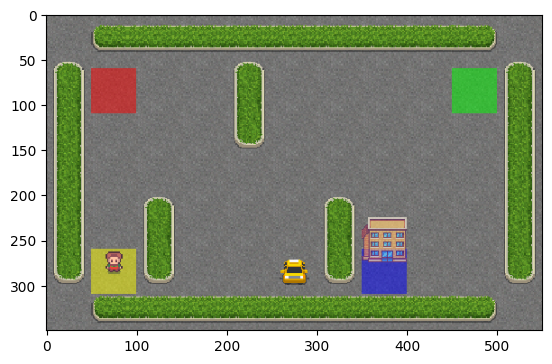

In [30]:
for episode in range(30):
  state = env.reset()
  done = False
  print("Episode: ", episode)

  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  for step in range(max_steps_per_episode):
    action = np.argmax(q_table[state, :])

    next_state, reward, done, info = env.step(action)

    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))

    print("step: ", step, " reward: ", reward)


    if done:
      #display.clear_output(wait=True)
      if reward == 20:
        print("******Reached Goal******")
      else:
        print("******Failed******")
      img.append(env.render('rgb_array'))

      break
    state = next_state

env.close()